In [1]:
# Victor Z and Ugochukwu Ikegwu
# UW-Madison, 2024
# use filters on micrograph

## Start here if working on google collab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specify the path of this file (This may differ for each user)
path = '/content/drive/MyDrive/StatsBookCode/Python/'

In [4]:
# This is to check if the speficied path above is correct
!echo $path
import os
os.path.isdir(path)

/content/drive/MyDrive/StatsBookCode/Python/


True

In [5]:
# This is needed so we can import packages from a different path than standard libraries
import sys
sys.path.append(path)

## Start from here if working on local computer

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure
from scipy.signal import convolve2d


In [7]:
# Reading and converting the image
in_image = io.imread(path+'Data/droplet1.jpg')
# Convert the image to grayscale
in_image_gray = color.rgb2gray(in_image)
# Convert the image to double (float64) format
f = in_image_gray.astype(np.float64) * 255  # Scale to 0-255 for display

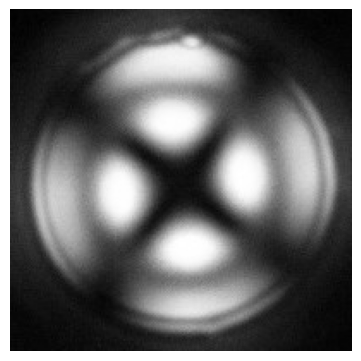

In [8]:
# Plotting
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(f.astype(np.uint8), cmap='gray')
plt.box(False)
plt.xticks([])
plt.yticks([])

plt.show()


## Sobel filter

In [9]:
# Define the vertical Sobel filter
g = np.array([[1, 2, 1],
              [0, 0, 0],
              [-1, -2, -1]]).T

# Apply the Sobel filter
fsob = convolve2d(f, g, mode='same')

# Normalize the result to the range [0, 1] for display
fsob_normalized = exposure.rescale_intensity(fsob, in_range='image', out_range=(0, 1))

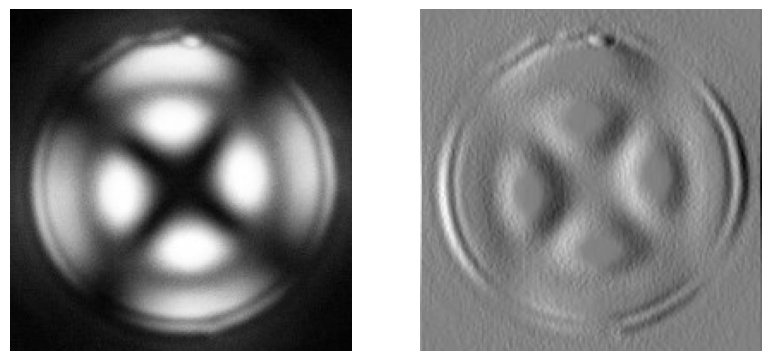

In [10]:
# Plotting the original and the filtered image
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(f.astype(np.uint8), cmap='gray')
plt.box(False)
plt.xticks([])
plt.yticks([])

# Sobel filtered image
plt.subplot(1, 3, 2)
plt.imshow(fsob_normalized, cmap='gray')
plt.box(False)
plt.xticks([])
plt.yticks([])

plt.show()

## Gaussian filter

In [11]:
from scipy.ndimage import gaussian_filter

# Apply Gaussian filter
sigma = 10
fn = gaussian_filter(f, sigma=sigma)

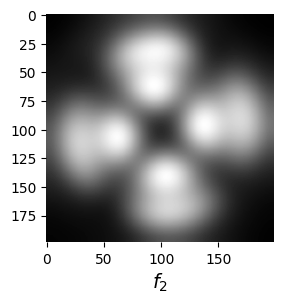

In [12]:
# Plotting
plt.figure(figsize=(10, 10))
plt.subplot(1,3,3)
plt.imshow(fn.astype(np.uint8), cmap='gray')
plt.box(False)
plt.xlabel('$f_2$', fontsize=14)
plt.show()